In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.io
import ipywidgets
# Modules for interactive plotting
import bokeh.plotting
import bokeh.io
bokeh.io.output_notebook()
from IPython.display import display
import os


%matplotlib notebook

Loading BokehJS ...

In [22]:
# Note: data file source from https://github.com/nsteinme/steinmetz-et-al-2019/wiki/data-files
directory = 'Cori_2016-12-14/'
locations = pd.read_csv(directory + 'channels.brainLocation.tsv', sep='\t')


In [3]:
# Import data


# Spike-related variables
spikes_times = np.load(os.path.join(directory, 'spikes.times.npy'))[:,0]
spikes_depths = np.load(os.path.join(directory, 'spikes.depths.npy'))[:,0]
spikes_amps = np.load(os.path.join(directory, 'spikes.amps.npy'))[:,0]
spikes_clusters = np.load(os.path.join(directory, 'spikes.clusters.npy'))[:,0]

# Trial-related variables
trials_feedback_times = np.load(os.path.join(directory, 'trials.feedback_times.npy'))[:,0]
trials_feedback_types = np.load(os.path.join(directory, 'trials.feedbackType.npy'))[:,0]
trials_gocue_times = np.load(os.path.join(directory, 'trials.goCue_times.npy'))[:,0]
trials_included = np.load(os.path.join(directory, 'trials.included.npy'))[:,0]
trials_start = np.load(os.path.join(directory, 'trials.intervals.npy'))[:,0]
trials_end = np.load(os.path.join(directory, 'trials.intervals.npy'))[:,1]
trials_repNum = np.load(os.path.join(directory, 'trials.repNum.npy'))[:,0]
trials_choice = np.load(os.path.join(directory, 'trials.response_choice.npy'))[:,0]
trials_response_times = np.load(os.path.join(directory, 'trials.response_times.npy'))[:,0]
trials_left_contrast = np.load(os.path.join(directory, 'trials.visualStim_contrastLeft.npy'))[:,0]
trials_right_contrast = np.load(os.path.join(directory, 'trials.visualStim_contrastRight.npy'))[:,0]
trials_stim_times = np.load(os.path.join(directory, 'trials.visualStim_times.npy'))[:,0]

# Cluster information
clusters_annotation = np.load(os.path.join(directory, 'clusters._phy_annotation.npy'))[:,0]
clusters_peakChannel = np.load(os.path.join(directory, 'clusters.peakChannel.npy'))[:,0]
clusters_brainLoc = locations.allen_ontology[clusters_peakChannel]

In [24]:
# Find 'good' clusters
print('Displaying good manually labelled clusters (top 100):')
np.where(clusters_annotation >= 2)[0][:100]

Displaying good manually labelled clusters (top 100):


array([  0,   1,   2,   3,   6,   7,   9,  10,  11,  13,  14,  15,  16,
        17,  20,  22,  23,  25,  26,  27,  28,  30,  33,  34,  35,  36,
        37,  39,  41,  43,  45,  47,  48,  49,  51,  52,  53,  54,  56,
        59,  60,  61,  67,  68,  69,  71,  72,  73,  75,  77,  78,  79,
        80,  82,  83,  84,  85,  86,  87,  88,  89,  90,  92,  93,  95,
        96,  97,  98,  99, 100, 103, 104, 105, 106, 107, 108, 109, 110,
       112, 114, 115, 116, 119, 120, 121, 122, 123, 127, 129, 130, 132,
       133, 134, 136, 138, 141, 142, 144, 146, 148], dtype=int64)

In [6]:
spikes_fr = pd.DataFrame({'times': spikes_times, 'depths': spikes_depths, 'amps': spikes_amps,
                          'clusters': spikes_clusters})
trials_fr = pd.DataFrame({'feedbackTimes': trials_feedback_times, 'feedbackType': trials_feedback_types,
                         'gocueTimes': trials_gocue_times, 'included': trials_included,
                         'start': trials_start, 'end': trials_end, 'repNum': trials_repNum,
                         'choice': trials_choice, 'response_times': trials_response_times,
                         'leftContrast': trials_left_contrast, 'rightContrast': trials_right_contrast,
                         'stimTimes': trials_stim_times})
clusters_fr = pd.DataFrame({'id': np.arange(len(clusters_annotation)), 'annotation': clusters_annotation, 
                            'brainLoc': clusters_brainLoc, 'peakChannel': clusters_peakChannel})

trials_fr['signedContrast'] = trials_fr.leftContrast - trials_fr.rightContrast

ncells = spikes_fr.clusters.unique().max() + 1

In [20]:
np.unique(clusters_fr.brainLoc)

array(['ACA', 'CA3', 'DG', 'LS', 'MOs', 'SUB', 'VISp', 'root'],
      dtype=object)

In [32]:
goodACAs = clusters_fr[(clusters_fr.brainLoc == 'ACA') & (clusters_fr.annotation >= 2)].id
goodVISps = clusters_fr[(clusters_fr.brainLoc == 'VISp') & (clusters_fr.annotation >= 2)].id

goodACAs = np.array(goodACAs)
goodVISps = np.array(goodVISps)
goodVISps

array([ 551,  552,  553,  557,  558,  560,  564,  565,  566,  569,  571,
        574,  575,  577,  578,  584,  586,  587,  588,  591,  594,  597,
        598,  600,  601,  602,  606,  610,  613,  617,  622,  626,  628,
        630,  632,  635,  637,  639,  640,  642,  643,  646,  647,  655,
        656,  658,  662,  665,  670,  672,  673,  677,  679,  681,  684,
        688,  695,  697,  699,  705,  707,  710,  712,  724,  726,  728,
        731,  734,  737,  738,  741,  742,  743,  748,  750,  755,  757,
        758,  762,  764,  766,  770,  775,  776,  780,  781,  785,  787,
        791,  797,  801,  806,  810,  811,  814,  815,  816,  821,  829,
        832,  833,  837,  839,  840,  842,  843,  848,  853,  857,  863,
        864,  865,  869,  875,  877,  881,  889,  891,  893,  894,  896,
        897,  899,  917,  924,  929,  930,  932,  936,  938,  941,  944,
        947,  951,  954,  958,  962,  963,  964,  967,  970,  974,  975,
        979,  982,  984,  997, 1001, 1002, 1003, 10

### Get the overall activity statistics
Here, we try to understand how 'active' the ACC or VC neurons are

In [45]:
cell_nspikes = []
for cellid in goodACAs:
    nspikes = np.sum(spikes_fr.clusters == cellid)
    #nspikes = spike_cell.shape[0]
    cell_nspikes.append(nspikes)

(array([41., 17., 12.,  8.,  2.,  4.,  3.,  3.,  3.,  2.,  1.,  1.,  1.,
         1.,  2.,  2.,  0.,  1.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,
         0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         1.]),
 array([  118.   ,  1383.225,  2648.45 ,  3913.675,  5178.9  ,  6444.125,
         7709.35 ,  8974.575, 10239.8  , 11505.025, 12770.25 , 14035.475,
        15300.7  , 16565.925, 17831.15 , 19096.375, 20361.6  , 21626.825,
        22892.05 , 24157.275, 25422.5  , 26687.725, 27952.95 , 29218.175,
        30483.4  , 31748.625, 33013.85 , 34279.075, 35544.3  , 36809.525,
        38074.75 , 39339.975, 40605.2  , 41870.425, 43135.65 , 44400.875,
        45666.1  , 46931.325, 48196.55 , 49461.775, 50727.   ]),
 <a list of 40 Patch objects>)

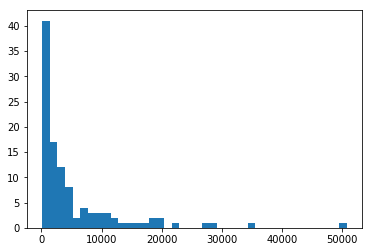

In [46]:
plt.hist(cell_nspikes, 40)

In [34]:
# Extract spikes of cluster 300
spike_300 = spikes_fr[spikes_fr.clusters == 10]
trials_fr.head()

,feedbackTimes,feedbackType,gocueTimes,included,start,end,repNum,choice,response_times,leftContrast,rightContrast,stimTimes,signedContrast
0,66.456227,1.0,66.296625,True,62.900284,67.423484,1.0,1.0,66.419612,1.0,0.0,65.269408,1.0
1,72.640326,1.0,72.077117,True,68.420838,73.604476,1.0,-1.0,72.602206,0.0,0.5,71.202703,-0.5
2,77.038396,1.0,76.877593,True,74.602902,78.006757,1.0,1.0,77.001671,1.0,0.5,76.052380,0.5
3,83.531699,1.0,81.996875,True,79.003653,84.506778,1.0,0.0,83.502065,0.0,0.0,81.235263,0.0
4,87.628565,-1.0,87.462962,True,85.501795,88.621336,1.0,1.0,87.617727,0.5,1.0,86.800952,-0.5


In [37]:
spike_300.shape[0]

(3849, 4)

In [10]:
spike_300

,times,depths,amps,clusters
104,0.046233,2869.273926,103.633972,10
2347,1.725933,2871.858398,99.703293,10
45871,15.136333,2886.694824,101.785027,10
65380,20.905600,2874.680664,131.901676,10
65587,20.937600,2883.366943,87.609786,10
73136,22.698300,2878.653809,113.650985,10
124356,37.242100,2879.361328,102.665942,10
159157,47.424300,2877.843994,120.884280,10
184787,54.855500,2886.878174,87.353681,10
185258,54.943167,2873.109863,99.664073,10


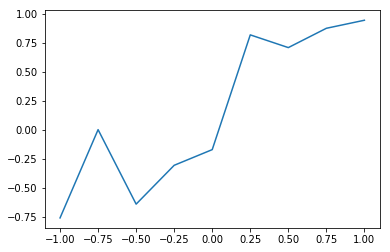

In [11]:
# Plot psychometric curve for this session
performance = trials_fr.groupby(['signedContrast'])['choice'].mean()
plt.plot(performance)

In [12]:
spike_300.head()

,times,depths,amps,clusters
104,0.046233,2869.273926,103.633972,10
2347,1.725933,2871.858398,99.703293,10
45871,15.136333,2886.694824,101.785027,10
65380,20.905600,2874.680664,131.901676,10
65587,20.937600,2883.366943,87.609786,10


In [50]:
# Align all rasters to visual stimulus onset
def splitSpikeTimesToTrials(spikes, tstarts, tends):
    '''
    spikes: the spikes array (nspikes)
    tstarts: trial start times array (ntrials)
    tends: trial end times array (ntrials)
    Returns a list of grouped spike times, ntrials sublists
    '''
    spikeTrialTimes = []
    for i in range(len(tstarts)):
        spikeTrial = spikes[(spikes > tstarts[i]) & (spikes < tends[i])]
        spikeTrialTimes.append(spikeTrial)
        
    return spikeTrialTimes
    
# Perform binning
def BinSpikeTimes(spikes, tstarts, window, nbins):
    '''
    spikes: an array of spike times, split into trials
    tstarts: trial start times (ntrials)
    window: [start, end], window to visualize from start to end
    binwidth: width of bin 
    Returns an nbins x ntrials array of spike counts
    '''
    spikeBinnedCounts = []
    for i in range(len(tstarts)):
        spikeTrial = spikes[(spikes > tstarts[i] + window[0]) & (spikes < tstarts[i] + window[1])]
        
        # Bin
        edges = np.linspace(tstarts[i] + window[0], tstarts[i] + window[1], nbins)
        counts, times = np.histogram(spikeTrial, bins=edges)
        spikeBinnedCounts.append(counts)
               
    return edges[:-1], np.array(spikeBinnedCounts)
        
    
def plot_binned_spikes(cluster_id, aligned_by, window, nbins):
    spike_cluster = spikes_fr[spikes_fr.clusters == cluster_id]
    nspikes = np.sum(spikes_fr.clusters == cluster_id)
    print('Number of spikes = ', nspikes)
    #print(spike_cluster.times[:100])
    
    if aligned_by == 'stim':
        edges, binned_activity = BinSpikeTimes(spike_cluster.times, trials_fr.stimTimes, window, nbins)
    elif aligned_by == 'start':
        edges, binned_activity = BinSpikeTimes(spike_cluster.times, trials_fr.start, window, nbins)
    elif aligned_by == 'feedback':
        edges, binned_activity = BinSpikeTimes(spike_cluster.times, trials_fr.feedbackTimes, window, nbins)
    elif aligned_by == 'response':
        edges, binned_activity = BinSpikeTimes(spike_cluster.times, trials_fr.response_times, window, nbins)
    else:
        print('Unrecognized type...')
        return None
    
    plt.figure() #figsize=(10, 20))
    plt.imshow(np.flipud(binned_activity), cmap='Greys', vmin=0, vmax=1, extent=[window[0], window[1], 0, 200], aspect='auto')
    return binned_activity
    

Number of spikes =  1498


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

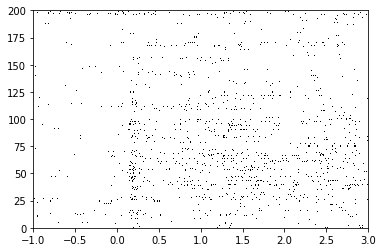

In [48]:
plot_binned_spikes(10, aligned_by='stim', window=[-1, 3], nbins=400)

In [51]:
def update(align_by, cell=0, window=[-1, 3]):
    # Find allen brain region
    print(locations.allen_ontology[clusters_peakChannel[cell]])
    plot_binned_spikes(cell, aligned_by=align_by, window=window, nbins=400)
    
    
    
ipywidgets.interactive(update, 
                       cell=ipywidgets.widgets.BoundedIntText(
                            value=0,
                            min=0,
                            max=ncells,
                            step=1,
                            description='CellID: ',
                            disabled=False),
                      window=ipywidgets.widgets.FloatRangeSlider(
                            value=[-1, 3],
                            min=-4,
                            max=4,
                            step=0.1,
                            description='Window (s):',
                            disabled=False,
                            continuous_update=False,
                            orientation='horizontal',
                            readout=True,
                            readout_format='.1f'),
                    align_by=ipywidgets.widgets.RadioButtons(
                        options=['start', 'stim', 'response', 'feedback'],
                        description='Align by:',
                        disabled=False
))



interactive(children=(RadioButtons(description='Align by:', options=('start', 'stim', 'response', 'feedback'),…

In [16]:
binned_activity = np.array([[0, 0, 0, 0, 0],
                           [0.1, 0.1, 0.1, 0.1, 0.1],
                           [0.5, 0.5, 0.5, 0.5, 0.5],
                           [1, 1, 1, 1, 1]])

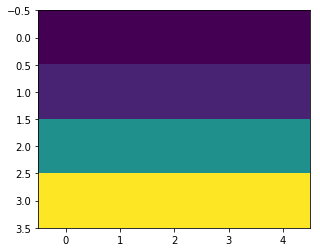

In [17]:
plt.figure()
plt.imshow(binned_activity)
plt.show()